## Summary
This is the 'Model Development' portion of a vehicle appraisal data analysis using the 'Automobile Data Set' from UCI's Machine Learning Repository. The uncleaned data is taken from 1985 Ward's Automotive Yearbook. This section of the data analysis includes understanding relationships between different variables and developing a prediction model to answers questions like:

* Is the dealer offering a fair value for my trade-in?
* Am I putting a fair value on my car?

Additional sections of the data analysis, including data wrangling, exploratory data analysis, and model evaluation, are written in separate notebooks which can be found within the same repository.

## Importing Libraries and Data

In [1]:
# importing tools and data
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# read the CSV file
df = pd.read_csv('resources/clean_df.csv')

## Simple Linear Regression & Residuals
* Yhat = a + b  X

In [2]:
lm = LinearRegression()
lm

LinearRegression()

In [3]:
# fitting the linear model using 'highway-mpg'
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X,Y)

LinearRegression()

In [4]:
# creating a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [5]:
# finding the intercept 'a'
lm.intercept_

array([38423.30585816])

In [6]:
# finding the slope 'b'
lm.coef_

array([[-821.73337832]])

In [7]:
# plugging into equation
lm1 = lm.intercept_ + (lm.coef_*(df[['highway-mpg']]))
lm1

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


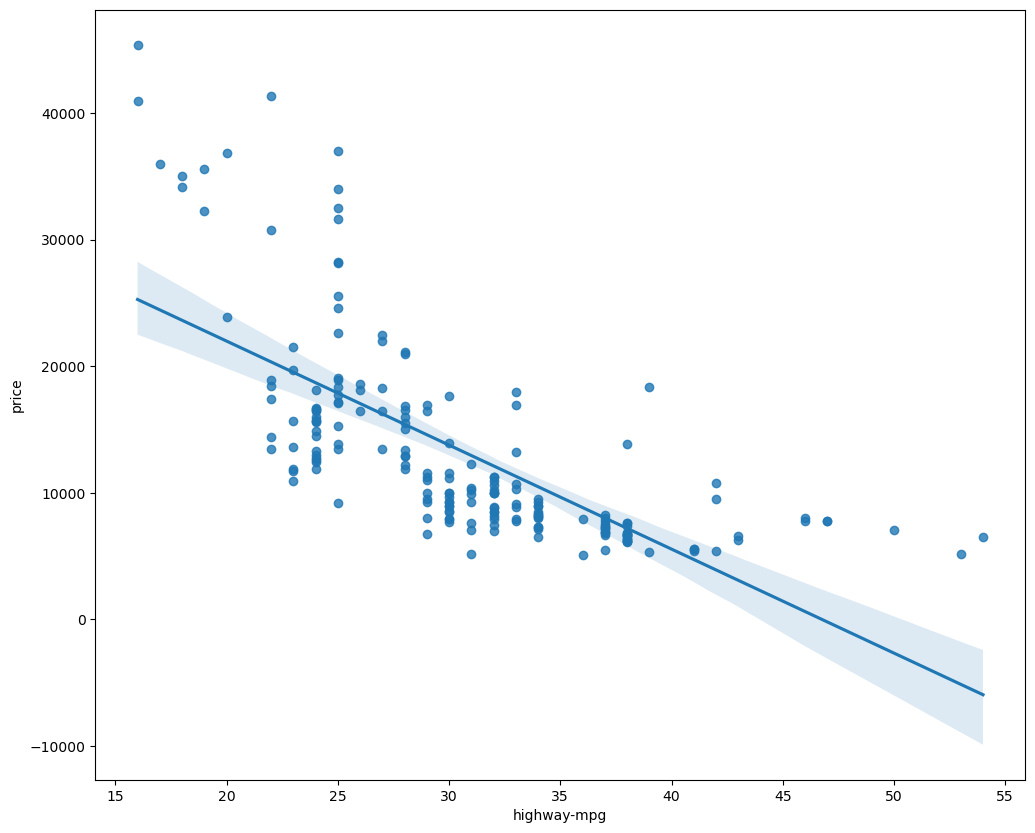

In [8]:
# plotting the relationships between 'highway-mpg' and 'price'
plt.figure(figsize=(12,10))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim=(0,)
plt.show()

We can see from this plot that 'price' is negatively-correlated with 'highway-mpg'. Now let's take a look at the residual plot.

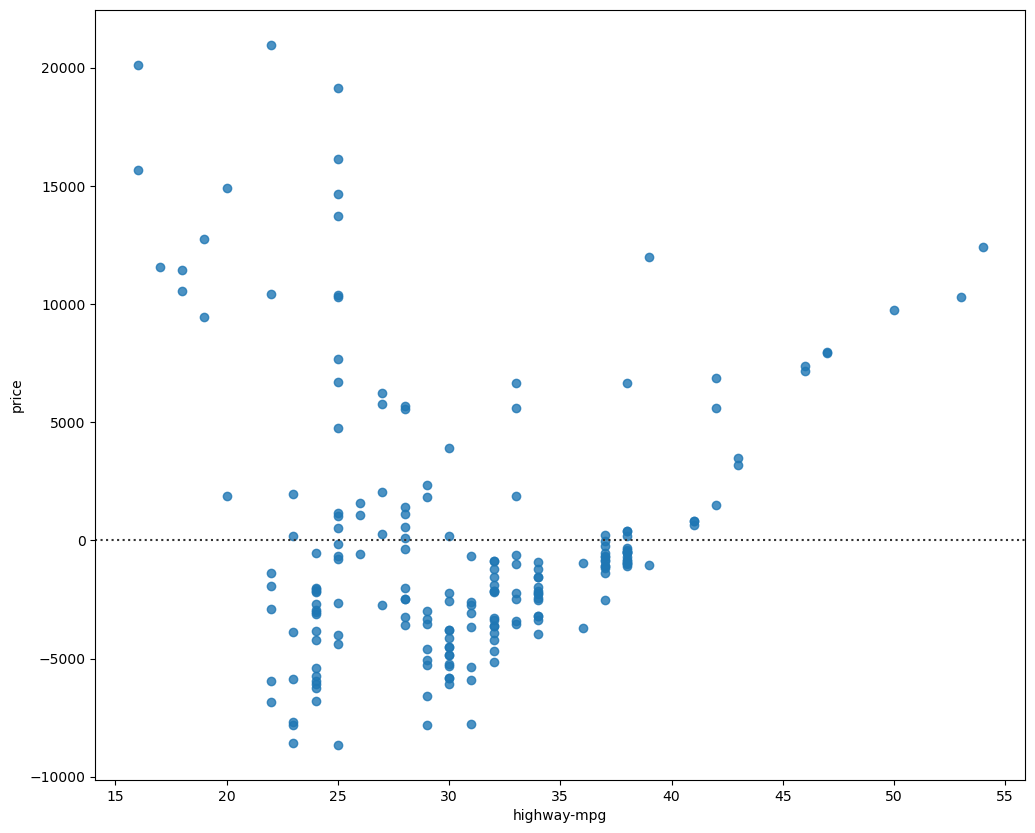

In [9]:
# residual plot
plt.figure(figsize=(12, 10))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In this residual plot we can see that the residuals are not randomly spread around the x-axis suggesting that a non-linear model might be more appropriate for this data.  Next let's look at the relationship between 'engine-size' and 'price'.

In [10]:
lm = LinearRegression()

In [11]:
# assigning variables and fitting for 'engine-size'
X = df[['engine-size']]
Y = df[['price']]

lm.fit(X,Y)

LinearRegression()

In [12]:
# creating a prediction based on 'engine-size'
Yhat = lm.predict(X)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [13]:
lm.intercept_

array([-7963.33890628])

In [14]:
lm.coef_

array([[166.86001569]])

In [15]:
# placing the variables in the equation
lm2 = lm.intercept_ + (lm.coef_*(df[['engine-size']]))
Price = lm2
Price

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


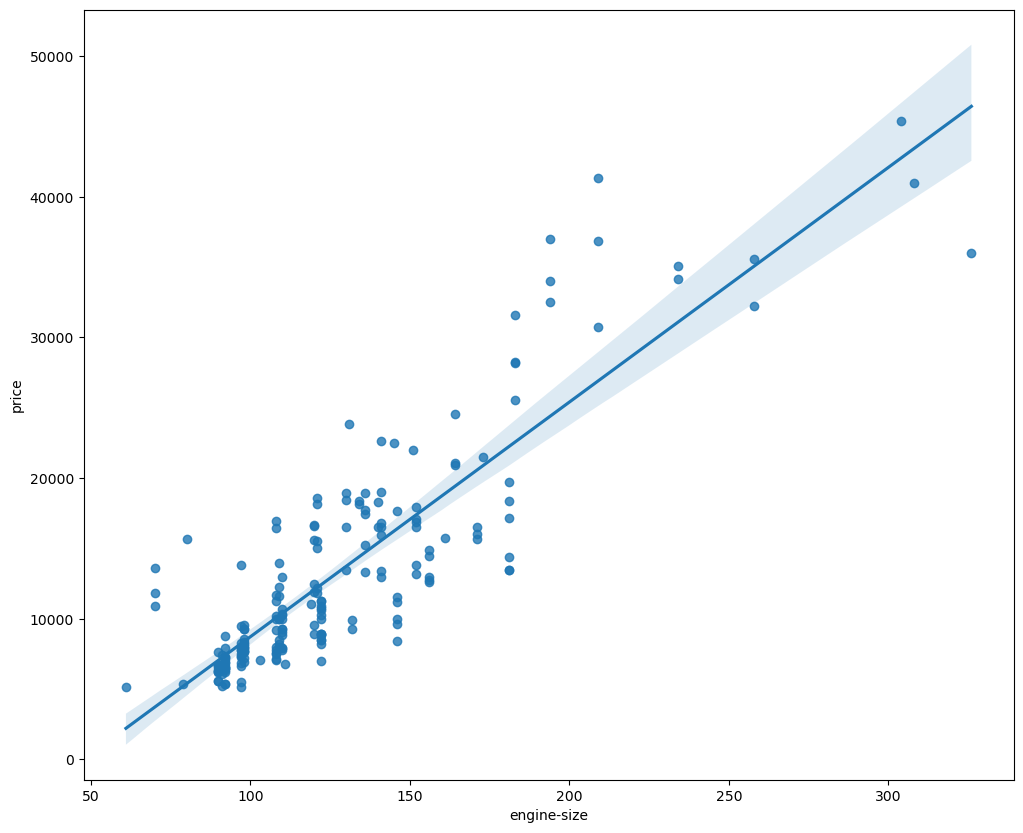

In [16]:
# plotting the relationship between 'engine-size' and 'price'
plt.figure(figsize=(12,10))
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim=(0,)
plt.show()

As evident from the scatterplot above, the relationship between 'engine-size' and 'price' is postively linear. Now the residual plot.

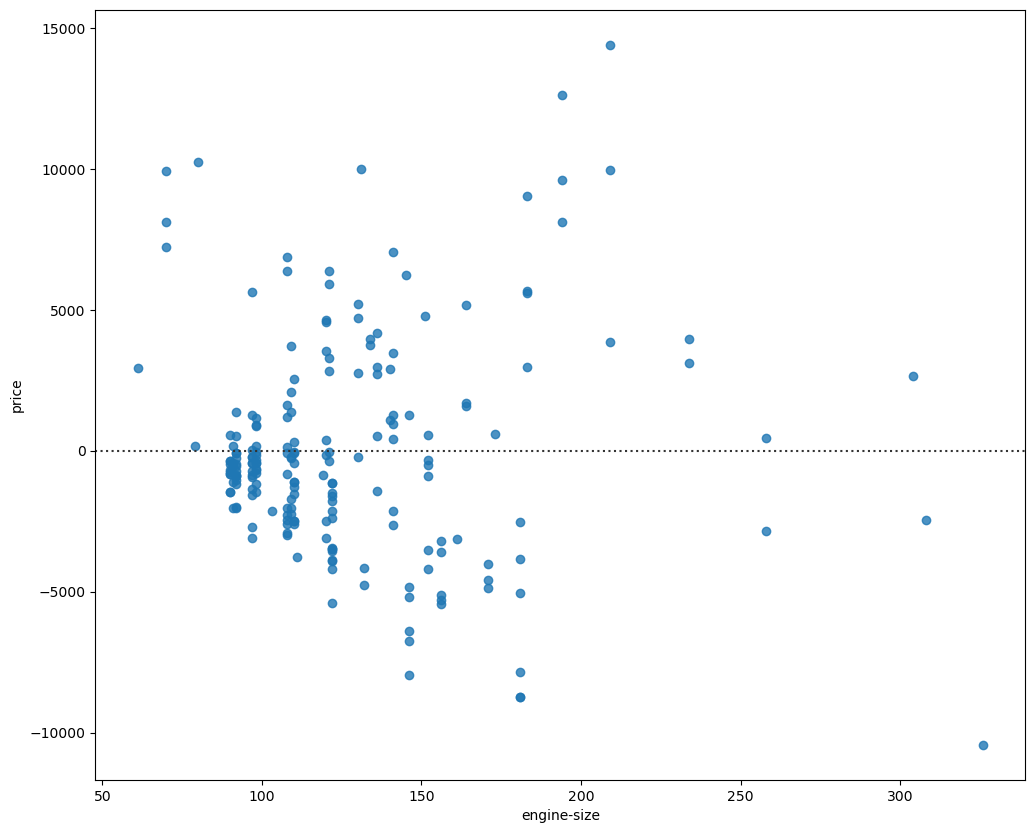

In [17]:
# plotting the residuals for 'engine-size' and 'price'
plt.figure(figsize=(12,10))
sns.residplot(x='engine-size', y='price', data=df)
plt.ylim=(0,)
plt.show()

In this residual plot we can see that the residuals are more randomly spread around the x-axis suggesting that a linear model might would be appropriate for this data. While we're at it let's plot the relationship between 'peak-rpm' and 'price' as well.

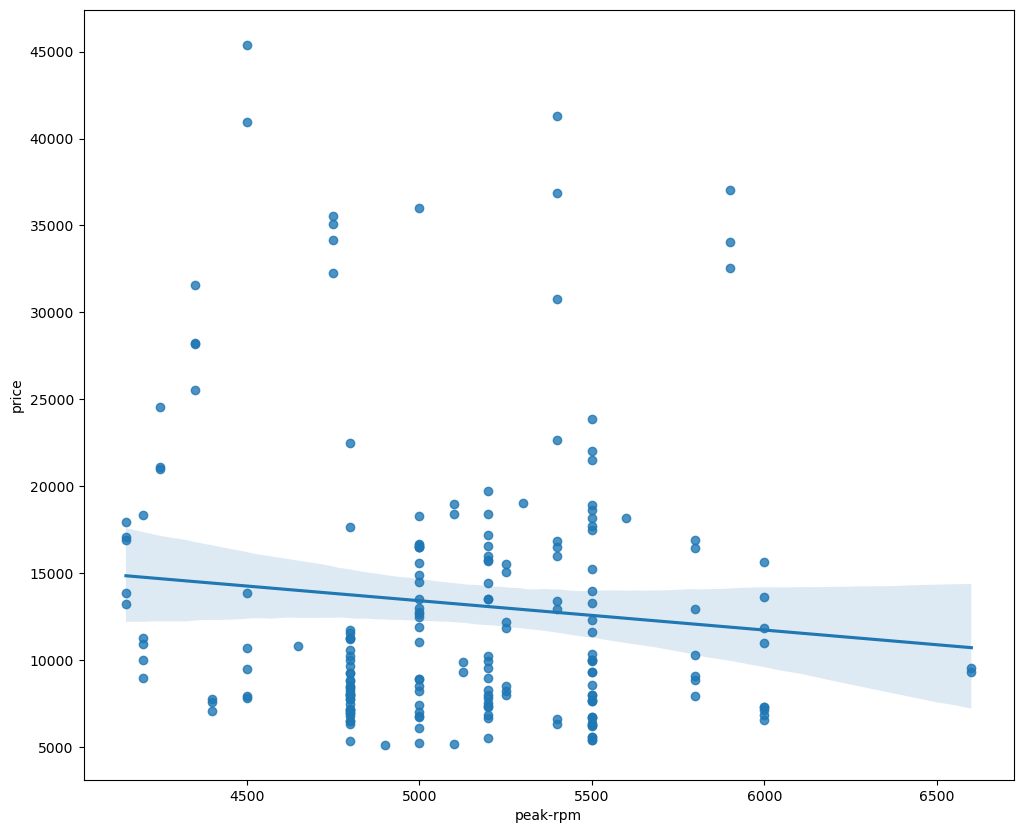

In [18]:
# plotting the relationship between 'peak-rpm' and 'price'
plt.figure(figsize=(12, 10))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim=(0,)
plt.show()

Here we can see that there is a weak correlation between 'peak-rpm' and 'price'. Finally, let's plot the residuals for this data as well.

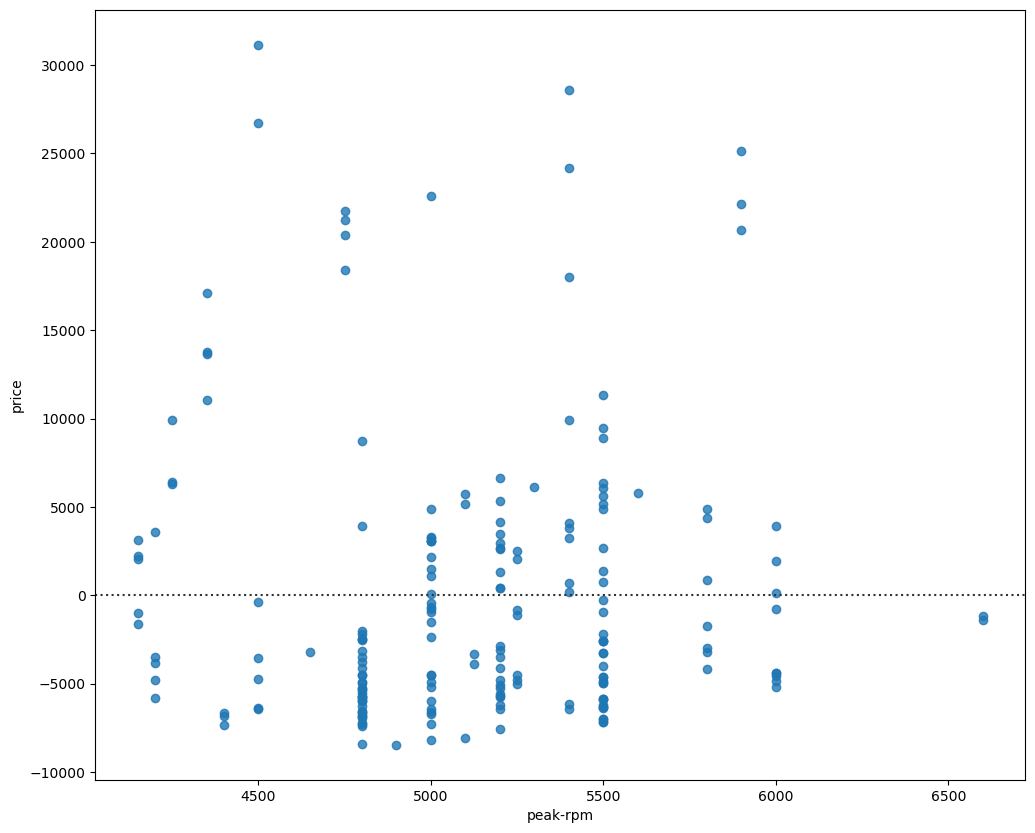

In [19]:
# plotting the residuals for 'peak-rpm' and 'price'
plt.figure(figsize=(12,10))
sns.residplot(x='peak-rpm', y='price', data=df)
plt.ylim=(0,)
plt.show()

Similar to the residual plot for 'engine-size' and 'price', the residuals in the plot for 'peak-rpm' and 'price' are also randomly spread around the x-axis suggesting that a linear model might would be appropriate for this data as well.

## Multiple Linear Regression & Distribution
From the EDA we know that there are several good predictors of price including 'horsepower', 'curb-weight', 'engine-size', and 'highway-mpg'.

In [20]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
# fitting the MLR with the four variables
lm.fit(z, df['price'])

LinearRegression()

In [22]:
# finding the intercept
a = lm.intercept_
a

-15811.863767729232

In [23]:
# finding the values of the coefficients
b1, b2, b3, b4 = lm.coef_
print(b1, b2, b3, b4)

53.53022808606994 4.708052531299508 81.51280005759968 36.15939250212032


In [24]:
# placing variables into equation
price = a + (b1*df['horsepower']) + (b2*df['curb-weight']) + (b3*df['engine-size']) + (b4*df['highway-mpg'])
price

0      13699.077005
1      13699.077005
2      19052.713467
3      10620.615244
4      15520.900253
           ...     
196    16694.521105
197    19505.114515
198    20475.221458
199    17803.805008
200    17103.928706
Length: 201, dtype: float64

In [25]:
# MLR for 'normalized-losses' and 'highway-mpg'
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses','highway-mpg']], df['price'])

LinearRegression()

In [26]:
b1, b2 = lm3.coef_
print(b1, b2)

1.4978958634133386 -820.4543401631865


In [27]:
a = lm3.intercept_
print(a)

38201.31327245728


In [28]:
# placing variables into equation
price = a + (b1*df['normalized-losses']) + (b2*df['highway-mpg'])
price

0      16231.789383
1      16231.789383
2      17052.243724
3      13833.337989
4      20396.972710
           ...     
196    15370.891855
197    17832.254875
198    19473.163556
199    16191.346195
200    17832.254875
Length: 201, dtype: float64

In [29]:
z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22


In [30]:
Yhat = lm.predict(z)

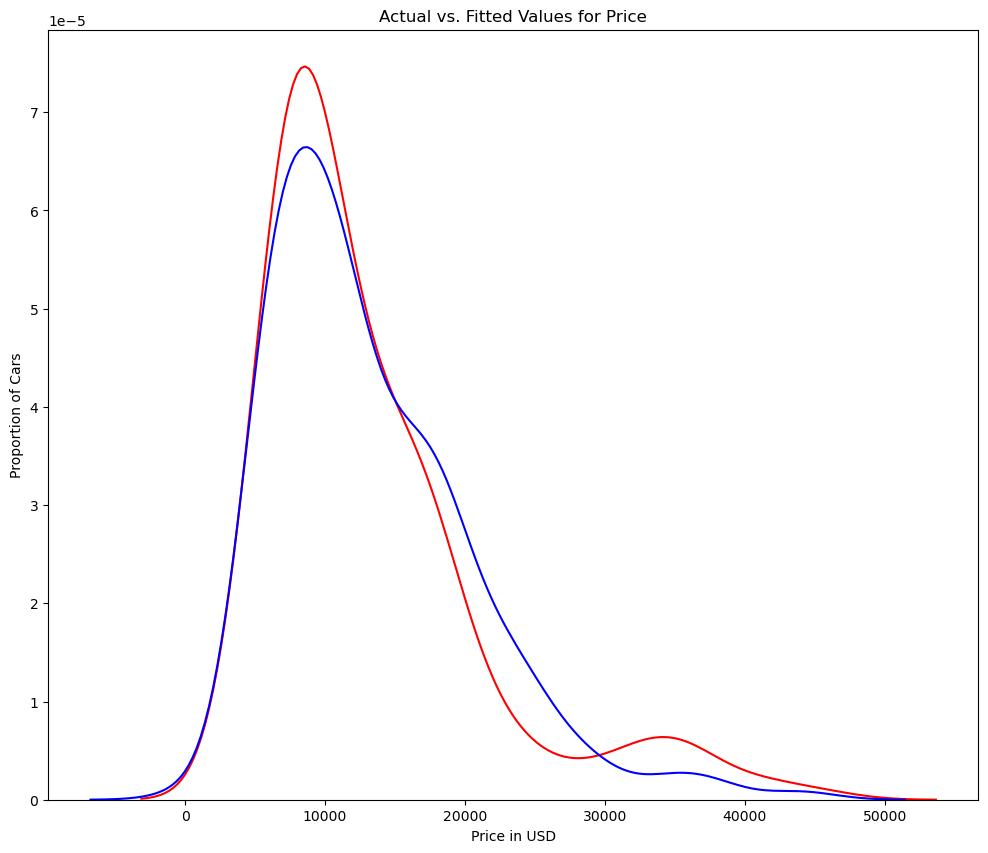

In [31]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price in USD')
plt.ylabel('Proportion of Cars')

plt.show()

From the distribution above we can see that the fitted values are relatively close to the actual values, but there is room for improvement.

## Polynomial Regression
Earlier we saw that the linear model for 'highway-mpg' and 'price' did not provide the best fit so now we'll try a polynomial model instead.

In [32]:
# creating the function
def plotpoly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    plt.show()

In [33]:
print(df.columns)
x = df['highway-mpg']
y = df['price']
print(x)
print(y)

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')
0      27
1      27
2      26
3      30
4      22
       ..
196    28
197    25
198    23
199    27
200    25
Name: highway-mpg, Length: 201, dtype: int64
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64


In [34]:
# creating the model using a one-dimensional polynomial of the 3rd order
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


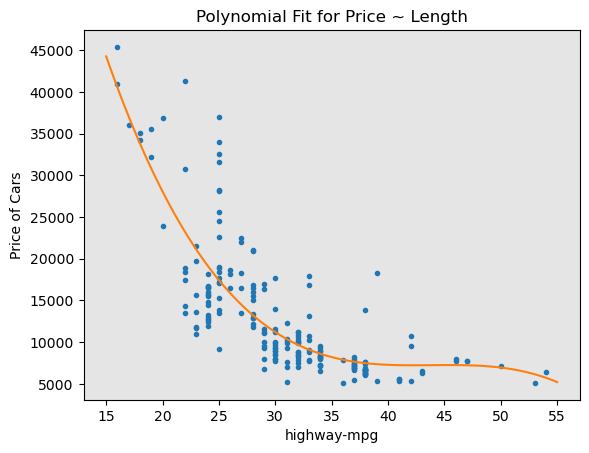

In [35]:
# placing model 'p' in plotpoly function
plotpoly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can above see from this plot that the polynomial model performs better than the linear model. Let's raise it to the 11th order.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


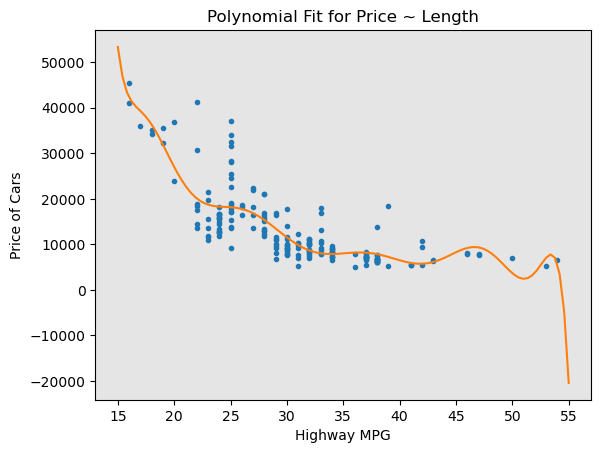

In [37]:
# creating an 11th order polynomial
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
plotpoly(p1, x, y, 'Highway MPG')

## Multivariate Polynomials
Now we will perform a polynomial transform on multiple features.

In [38]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [39]:
# original data has 201 samples and 4 features
z.describe

<bound method NDFrame.describe of      horsepower  curb-weight  engine-size  highway-mpg
0           111         2548          130           27
1           111         2548          130           27
2           154         2823          152           26
3           102         2337          109           30
4           115         2824          136           22
..          ...          ...          ...          ...
196         114         2952          141           28
197         160         3049          141           25
198         134         3012          173           23
199         106         3217          145           27
200         114         3062          141           25

[201 rows x 4 columns]>

In [40]:
# after the transformation there are 201 samples and 15 features
z_pr = pr.fit_transform(z)
z_pr.shape

(201, 15)

## Pipelines

In [41]:
# creating the pipeline by creating a list of tuples
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [42]:
# put into the arugment of the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
# convert 'z' to a float to avoid warnings
z = z.astype(float)
z.dtypes

horsepower     float64
curb-weight    float64
engine-size    float64
highway-mpg    float64
dtype: object

In [44]:
# normalizing the data and fitting the model
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
# normalizing, transforming, and producing a prediction
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

## Finding the r-squared Value and Mean Squared Error (MSE)
* Finding the r<sup>2</sup> value and mean squared error for our linear regression model
* Finding the r<sup>2</sup> value and mean squared error for our multiple linear regression model
* Finding the r<sup>2</sup> value and mean squared error for our polynomial fit

#### Linear Regression Model R-squared

In [46]:
# first the linear regression model of 'highway-mpg' and 'price'
x = df[['highway-mpg']]
y = df[['price']]
lm.fit(x, y)
print('The R-square value is: ', lm.score(x,y))

The R-square value is:  0.4965911884339175


This r<sup>2</sup> value tells us that ~49.659% of the price is explained by this linear regression model.

In [47]:
# predicting the output of the first four values
Yhat = lm.predict(x)
print('The output of the first four predicted values is: ',Yhat[0:4])

The output of the first four predicted values is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


#### Linear Regression Model MSE

In [48]:
# comparing the predicted results with the actual results using the MSE
mse = mean_squared_error(df['price'], Yhat)
print('The mean squared error of \'price\' and predicted value is: ', mse)

The mean squared error of 'price' and predicted value is:  31635042.944639895


#### Multiple Linear Regression Model R-squared

In [49]:
# next for our multiple linear regression model
lm.fit(z,df['price'])
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093732522175299


This r<sup>2</sup> value tells us that ~80.937% of the price is explained by this multiple linear regression model.

In [50]:
# making a prediction
Yhat_multi = lm.predict(z)

#### Multiple Linear Regression Model MSE

In [51]:
# comparing the results
print('The mean square error of \'price\' and predicted value using multiple linear regression is: ', mean_squared_error(df['price'], Yhat_multi))

The mean square error of 'price' and predicted value using multiple linear regression is:  11979300.34981888


#### Polynomial Regression Model R-squared

In [52]:
# r-squared and MSE for our polynomial fit
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


This r<sup>2</sup> value tells us that ~67.419% of the price is explained by this polynomial fit.

#### Polynomial Regression MSE

In [53]:
# MSE for polynomial fit
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

In [54]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [55]:
lm.fit(x,y)
lm

LinearRegression()

In [56]:
Yhat = lm.predict(new_input)
Yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

Next we'll plot the data.

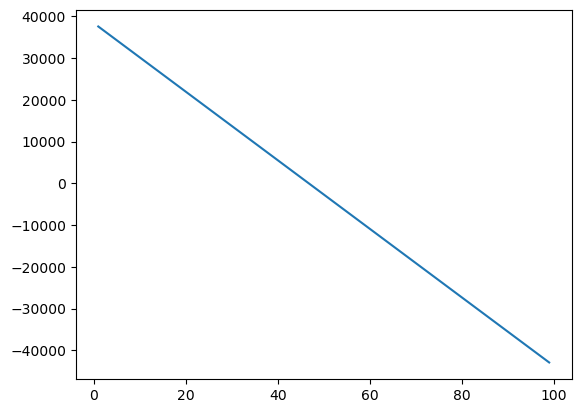

In [57]:
plt.plot(new_input, Yhat)
plt.show()

By comparing the r<sup>2</sup> values and the MSE for each of the models, we can conclude that the multiple linear regression model is the best model to predict price from our dataset. This is because it has both the highest r<sup>2</sup> value and the smallest MSE. This makes sense because we have 27 total variables in the dataset and know that more than one of those variables is a potential predictor of price. Our MLR model uses 'horsepower', 'curb-weight', 'engine-size', and 'highway-mpg' as predictor variables of price.

*Data analysis continued in '1985 Vehicle Appraisal Model Evaluation'.*